In [1]:
!pip install fbprophet

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
from fbprophet import Prophet 
print(f'Version {fbprophet.__version__}')

Version 0.7.1


In [4]:
raw_df = pd.read_csv("Vaccines_Dataset (2).csv", index_col=0)
raw_df.head()

,VAERS_ID,RECVDATE,STATE,STATE_NAME,LATITUDE,LONGITUDE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,01/01/2021,TX,Texas,31.968599,-99.901813,33.0,F,Right side of epiglottis swelled up and hinder...,No,Alive,No,No,No,0,No,No,Yes,12/28/2020,12/30/2020,2,None,None,None,None,None,No,Yes,No,Pcn and bee venom,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,None,None,None
1,916601,01/01/2021,CA,California,36.778261,-119.417932,73.0,F,Approximately 30 min post vaccination administ...,No,Alive,No,No,No,0,No,No,Yes,12/31/2020,12/31/2020,0,None,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,None,No,Yes,No,"""Dairy""",COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,None,None,None
2,916602,01/01/2021,WA,Washington,47.751074,-120.740139,23.0,F,"About 15 minutes after receiving the vaccine, ...",No,Alive,No,No,No,0,No,No,Unknown,12/31/2020,12/31/2020,0,None,None,None,None,None,No,No,Yes,Shellfish,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,None
3,916603,01/01/2021,WA,Washington,47.751074,-120.740139,58.0,F,"extreme fatigue, dizziness,. could not lift my...",No,Alive,No,No,No,0,No,No,Yes,12/23/2020,12/23/2020,0,None,None,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",No,No,No,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,unknown,UNK,0,0,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,None,None
4,916604,01/01/2021,TX,Texas,31.968599,-99.901813,47.0,F,"Injection site swelling, redness, warm to the ...",No,Alive,No,No,No,0,No,No,No,12/22/2020,12/29/2020,7,None,None,None,None,None,No,No,No,Na,COVID19,MODERNA,0,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,None


In [21]:
vaccine_number_df = raw_df.groupby(["RECVDATE"])["VAERS_ID"].count().reset_index()
vaccine_number_df.head()

,RECVDATE,VAERS_ID
0,01/01/2021,457
1,01/02/2021,419
2,01/03/2021,374
3,01/04/2021,1311
4,01/05/2021,1716


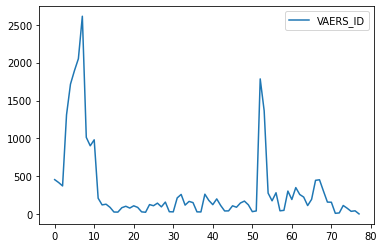

In [22]:
vaccine_number_df.plot()

In [23]:
vaccine_number_df.columns = ['ds', 'y']
vaccine_number_df["ds"]=pd.to_datetime(vaccine_number_df["ds"])
vaccine_number_df.columns

Index(['ds', 'y'], dtype='object')

In [24]:
vaccine_number_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [25]:
model = Prophet()
model.fit(vaccine_number_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## In-Sample Forecast

In [28]:
vaccine_number_df ["ds"].agg({"Max":"max","Min":"min"})

Max   2021-03-19
Min   2021-01-01
Name: ds, dtype: datetime64[ns]

In [31]:
# future = [] 
# for i in range(1, 13):
#     date = "2021-%02d" % i
#     future.append(date)
future = pd.DataFrame(["2021-02","2021-03"], columns = ["ds"])
future["ds"]=pd.to_datetime(future["ds"])

          ds        yhat  yhat_lower   yhat_upper
0 2021-02-01  583.414025   -4.635226  1184.179062
1 2021-03-01  342.651817 -274.693735   917.681271


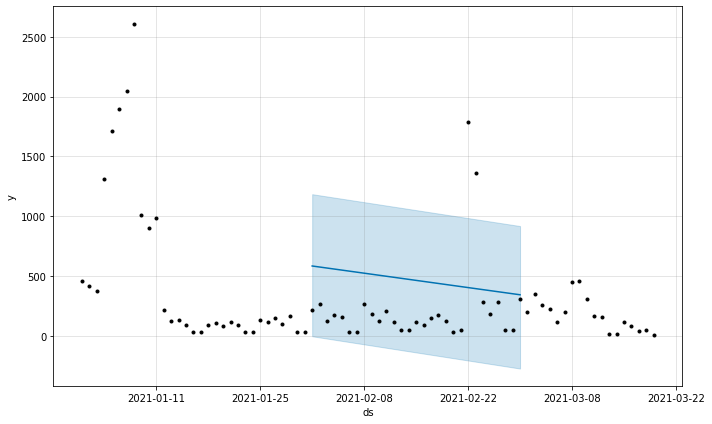

In [32]:
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
plt.show()

## Out of Sample Forecast

In [41]:
future = [] 
for i in range(4, 13):
    date = "2021-%02d" % i
    future.append(date)
future = pd.DataFrame(future, columns = ["ds"])
future["ds"]=pd.to_datetime(future["ds"])

          ds         yhat   yhat_lower  yhat_upper
0 2021-04-01   -95.392011  -752.487653  463.597341
1 2021-05-01  -557.600320 -1148.797889   50.793478
2 2021-06-01  -528.589186 -1115.667982   74.204722
3 2021-07-01  -877.859688 -1481.758560 -277.421127
4 2021-08-01 -1345.708060 -1947.382865 -791.123726


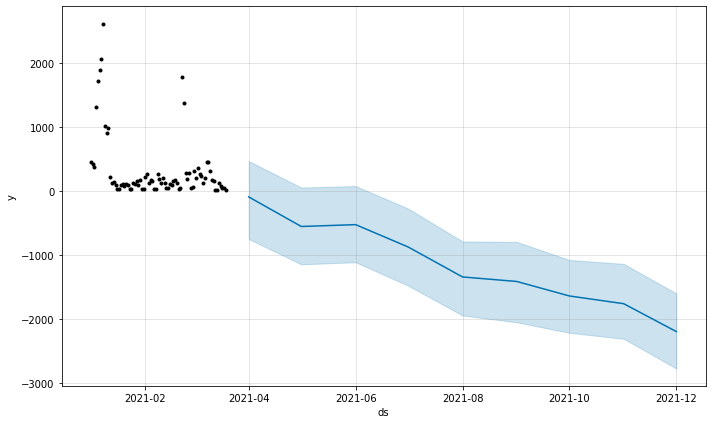

In [42]:
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
plt.show()

## Evaluate efficency 

MAE: 1229.436


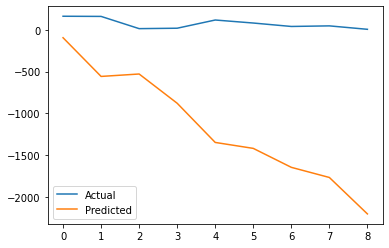

In [44]:
from sklearn.metrics import mean_absolute_error
y_true = vaccine_number_df['y'][-9:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae:.3f}')
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [38]:
vaccine_number_df["y"]

0      457
1      419
2      374
3     1311
4     1716
      ... 
73     116
74      80
75      39
76      46
77       5
Name: y, Length: 78, dtype: int64